In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from mpl_toolkits import mplot3d
import statsmodels.api as sm

In [4]:
directory = '/Users/Rachel Veenstra/Desktop/Coding/introcoding-spring-2019/Datasets/'

glob.os.chdir(directory)

In [9]:
data = pd.read_csv('corn_allometric_biomass.csv')
data.head(5)
data.tail(5)

,height_cm,stem_diam_mm,dry_biomass_g
33,32.5,4.5,0.27
34,24.0,3.6,0.15
35,31.5,3.7,0.13
36,27.5,3.3,0.13
37,27.5,3.4,0.14


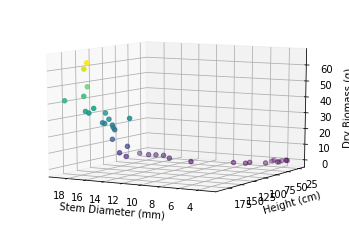

In [21]:
fig = plt.figure()
ax = plt.axes(projection = '3d')


xdata = data.stem_diam_mm
ydata = data.height_cm
zdata = data.dry_biomass_g

ax.set_xlabel("Stem Diameter (mm)")
ax.set_ylabel("Height (cm)")
ax.set_zlabel("Dry Biomass (g)")



ax.scatter3D(xdata, ydata, zdata, c=zdata)

ax.view_init(elev=10, azim = 120)

plt.show()

In [26]:
X = np.column_stack( (np.ones(data.shape[0]),
                      data.stem_diam_mm,
                      data.height_cm,
                      data.stem_diam_mm*data.height_cm) )

print(X)

[[1.00000e+00 5.70000e+00 7.10000e+01 4.04700e+02]
 [1.00000e+00 4.40000e+00 3.90000e+01 1.71600e+02]
 [1.00000e+00 4.30000e+00 5.55000e+01 2.38650e+02]
 [1.00000e+00 3.70000e+00 4.15000e+01 1.53550e+02]
 [1.00000e+00 3.60000e+00 4.00000e+01 1.44000e+02]
 [1.00000e+00 6.70000e+00 7.70000e+01 5.15900e+02]
 [1.00000e+00 5.60000e+00 6.40000e+01 3.58400e+02]
 [1.00000e+00 9.50000e+00 1.12000e+02 1.06400e+03]
 [1.00000e+00 1.71000e+01 1.81000e+02 3.09510e+03]
 [1.00000e+00 1.59000e+01 1.70000e+02 2.70300e+03]
 [1.00000e+00 1.64000e+01 1.89000e+02 3.09960e+03]
 [1.00000e+00 1.56000e+01 1.71000e+02 2.66760e+03]
 [1.00000e+00 1.60000e+01 1.84000e+02 2.94400e+03]
 [1.00000e+00 1.69000e+01 1.86000e+02 3.14340e+03]
 [1.00000e+00 1.45000e+01 1.71000e+02 2.47950e+03]
 [1.00000e+00 1.72000e+01 1.82000e+02 3.13040e+03]
 [1.00000e+00 1.89000e+01 1.89000e+02 3.57210e+03]
 [1.00000e+00 1.63000e+01 1.88000e+02 3.06440e+03]
 [1.00000e+00 1.45000e+01 1.50000e+02 2.17500e+03]
 [1.00000e+00 1.58000e+01 1.660

In [28]:
model = sm.OLS(data.dry_biomass_g, X)

In [30]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          dry_biomass_g   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     63.71
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           4.87e-14
Time:                        15:46:03   Log-Likelihood:                -129.26
No. Observations:                  38   AIC:                             266.5
Df Residuals:                      34   BIC:                             273.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8097      6.022      3.124      0.0

In [31]:
X_pruned = np.column_stack( (np.ones(data.shape[0]),
                      data.stem_diam_mm,
                      data.stem_diam_mm*data.height_cm) )

model_pruned = sm.OLS(data.dry_biomass_g, X_pruned)
results_pruned = model_pruned.fit()

print(results_pruned.summary())

                            OLS Regression Results                            
Dep. Variable:          dry_biomass_g   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     90.81
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.40e-14
Time:                        15:47:29   Log-Likelihood:                -130.54
No. Observations:                  38   AIC:                             267.1
Df Residuals:                      35   BIC:                             272.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0338      5.263      2.666      0.0